<a href="https://colab.research.google.com/github/Ndy-S/machine-learning-fundamental/blob/main/Natural%20Language%20Processing%20in%20TensorFlow/W1_sentiment_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment in Text

## Word Based Encodings
### ASCII Encodings (training a neural network with just a letters could be daunting task)

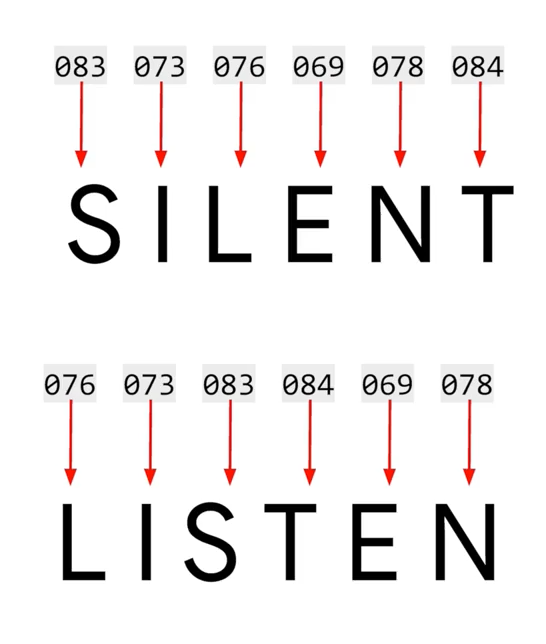

### Word Encodings

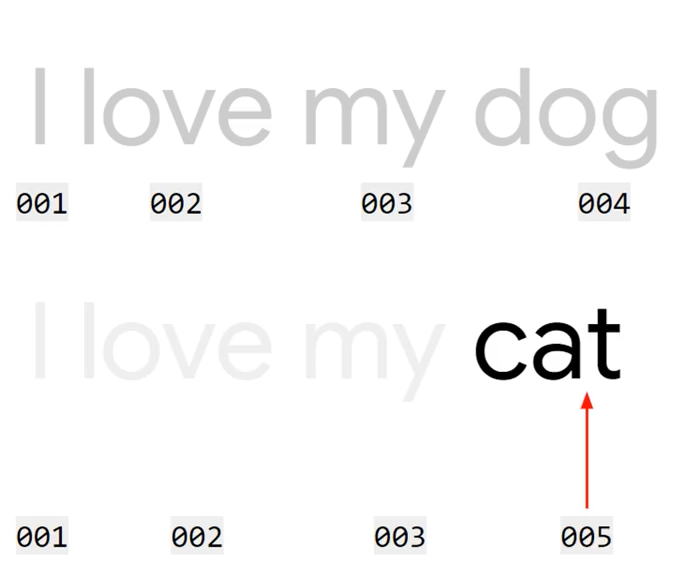

In [1]:
# SECTION DIVIDER

## Using APIs

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = [
    'I love my dog',
    'I love my cat',
    # Tokenizer strips the punctuation
    'You love my dog!'
]

tokenizer = Tokenizer(num_words = 100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}


In [3]:
# SECTION DIVIDER

## Text to Sequence

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words = 100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)

print(word_index)
print(sequences)

{'my': 1, 'love': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6, 'do': 7, 'think': 8, 'is': 9, 'amazing': 10}
[[4, 2, 1, 3], [4, 2, 1, 6], [5, 2, 1, 3], [7, 5, 8, 1, 3, 9, 10]]


In [5]:
test_data = [
    'i really love my dog',
    'my dog loves my manatee'
]

test_seq = tokenizer.texts_to_sequences(test_data)
print(test_seq)
print(word_index)

[[4, 2, 1, 3], [1, 3, 1]]
{'my': 1, 'love': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6, 'do': 7, 'think': 8, 'is': 9, 'amazing': 10}


In [6]:
# SECTION DIVIDER

## Looking More at the Tokenizer

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)

test_data = [
    'i really love my dog',
    'my dog really loves my manatee'
]

test_seq = tokenizer.texts_to_sequences(test_data)
print(test_seq)
print(word_index)

[[5, 1, 3, 2, 4], [2, 4, 1, 1, 2, 1]]
{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}


In [8]:
# SECTION DIVIDER

## Padding

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)

padded = pad_sequences(sequences)
print(word_index)
print(sequences)
print(padded)

{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]
[[ 0  0  0  5  3  2  4]
 [ 0  0  0  5  3  2  7]
 [ 0  0  0  6  3  2  4]
 [ 8  6  9  2  4 10 11]]


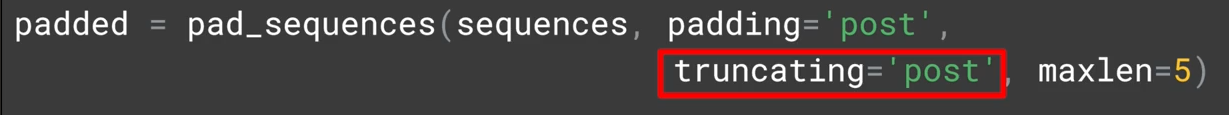

In [11]:
# SECTION DIVIDER

## Sarcasm, really

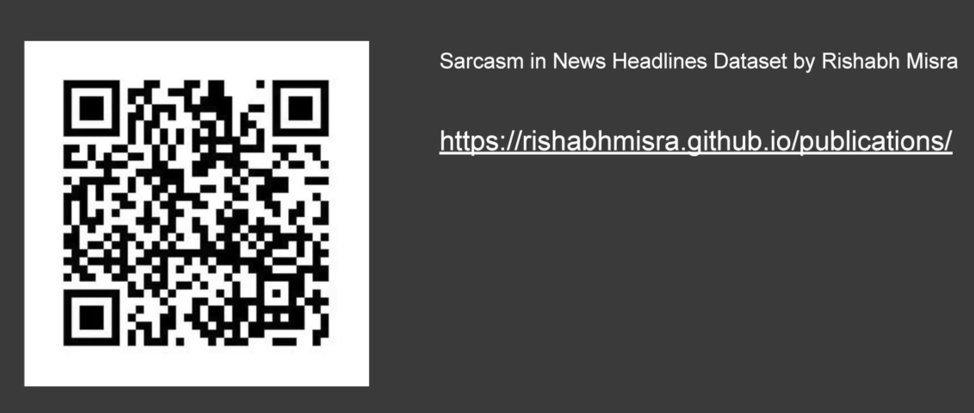

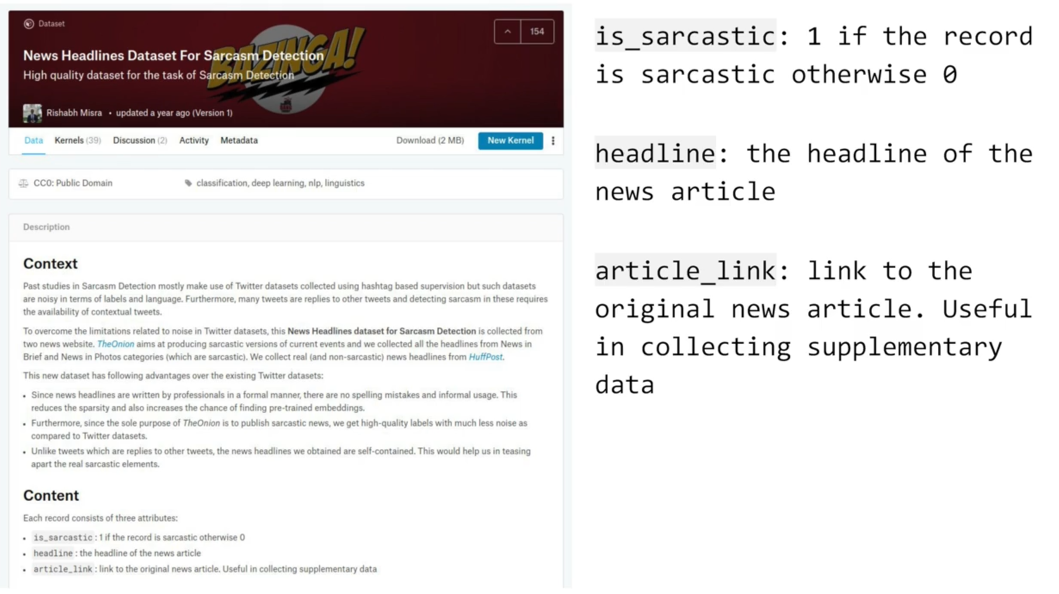

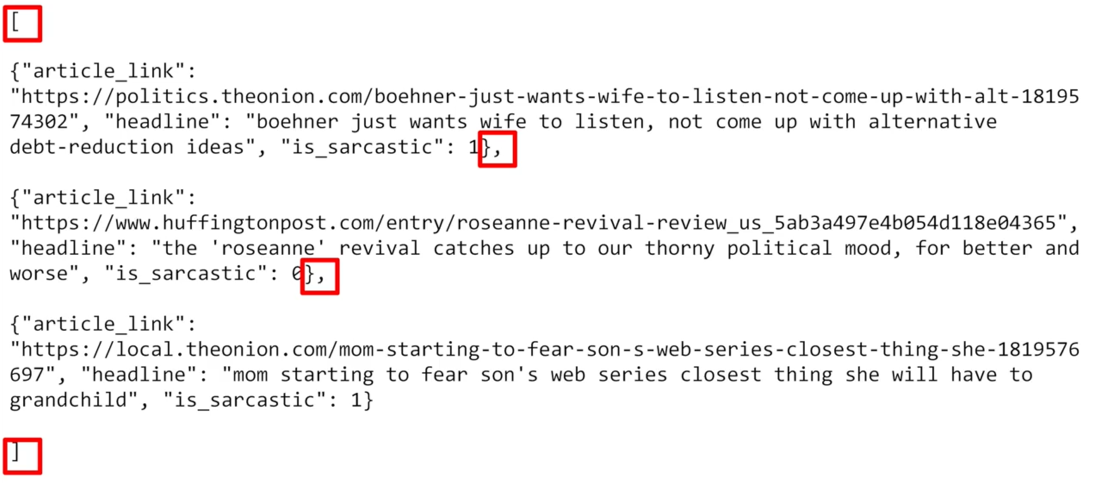

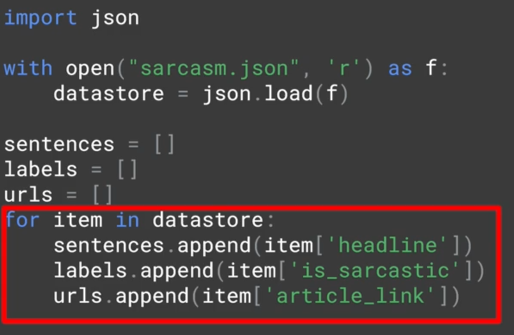

In [12]:
# SECTION DIVIDER

## Working with the Tokenizer

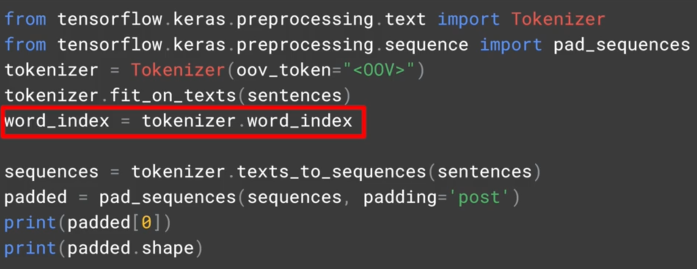

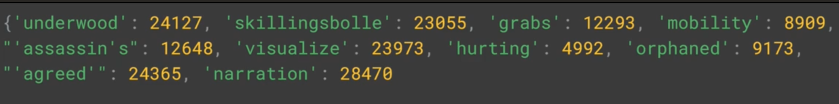

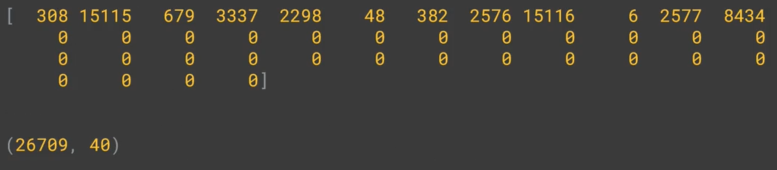

In [13]:
# SECTION DIVIDER

## Tokenizing the Sarcasm Dataset Code

In [14]:
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2023-09-16 15:18:50--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.207, 172.253.62.207, 172.253.115.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.02s   

2023-09-16 15:18:50 (246 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [15]:
import json

with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

In [16]:
# Non-sarcastic headline
print(datastore[0])

# Sarcastic headline
print(datastore[20000])

{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5', 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers", 'is_sarcastic': 0}
{'article_link': 'https://www.theonion.com/pediatricians-announce-2011-newborns-are-ugliest-babies-1819572977', 'headline': 'pediatricians announce 2011 newborns are ugliest babies in 30 years', 'is_sarcastic': 1}


In [17]:
# Initialize lists
sentences = []
labels = []
urls = []

# Append elements in the dictionaries into each list
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

In [18]:
# Preprocessing the headlines
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
print(f'number of words in word_index: {len(word_index)}')

print(f'word_index: {word_index}')
print()

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')

index = 2
print(f'sample headline: {sentences[index]}')
print(f'padded sequence: {padded[index]}')
print()

print(f'shape of padded sequences: {padded.shape}')

number of words in word_index: 29657
word_index: {'<OOV>': 1, 'to': 2, 'of': 3, 'the': 4, 'in': 5, 'for': 6, 'a': 7, 'on': 8, 'and': 9, 'with': 10, 'is': 11, 'new': 12, 'trump': 13, 'man': 14, 'from': 15, 'at': 16, 'about': 17, 'you': 18, 'this': 19, 'by': 20, 'after': 21, 'up': 22, 'out': 23, 'be': 24, 'how': 25, 'as': 26, 'it': 27, 'that': 28, 'not': 29, 'are': 30, 'your': 31, 'his': 32, 'what': 33, 'he': 34, 'all': 35, 'just': 36, 'who': 37, 'has': 38, 'will': 39, 'more': 40, 'one': 41, 'into': 42, 'report': 43, 'year': 44, 'why': 45, 'have': 46, 'area': 47, 'over': 48, 'donald': 49, 'u': 50, 'day': 51, 'says': 52, 's': 53, 'can': 54, 'first': 55, 'woman': 56, 'time': 57, 'like': 58, 'her': 59, "trump's": 60, 'old': 61, 'no': 62, 'get': 63, 'off': 64, 'an': 65, 'life': 66, 'people': 67, 'obama': 68, 'now': 69, 'house': 70, 'still': 71, "'": 72, 'women': 73, 'make': 74, 'was': 75, 'than': 76, 'white': 77, 'back': 78, 'my': 79, 'i': 80, 'clinton': 81, 'down': 82, 'if': 83, '5': 84, 'w

In [19]:
# SECTION DIVIDER

## Explore the BBC News Archive